In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2024-09-10 09:43:03.937606: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 09:43:06.803225: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-10 09:43:06.803355: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-10 09:43:06.807310: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-10 09:43:07.096208: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
X = data.drop('species', axis = 1)
y = data['species']

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [8]:
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 10)

# Sequential

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()
model.add(Dense(12, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


2024-09-10 09:43:07.795989: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 09:43:07.798909: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-10 09:43:07.880759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:43:07.880804: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-10 09:43:07.880825: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_data = (X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred, columns = y.columns)

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 1.1182 - accuracy: 0.3400

2024-09-10 09:43:08.441421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:43:08.491586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:43:08.491648: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 98ms/step - loss: 1.1094 - accuracy: 0.3429 - val_loss: 1.1034 - val_accuracy: 0.3111
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 1.1015 - accuracy: 0.3429 - val_loss: 1.0968 - val_accuracy: 0.3111
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 1.0937 - accuracy: 0.3429 - val_loss: 1.0906 - val_accuracy: 0.3333
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 1.0743 - accuracy: 0.3800

2024-09-10 09:43:08.699287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:43:08.722866: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:43:08.722949: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 26ms/step - loss: 1.0866 - accuracy: 0.3429 - val_loss: 1.0847 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 29ms/step - loss: 1.0796 - accuracy: 0.3429 - val_loss: 1.0792 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 1.0732 - accuracy: 0.3429 - val_loss: 1.0739 - val_accuracy: 0.3111
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 1.0664 - accuracy: 0.3429 - val_loss: 1.0687 - val_accuracy: 0.3111
Epoch 8/100
3/3 [==============================] - 0s 31ms/step - loss: 1.0603 - accuracy: 0.3429 - val_loss: 1.0636 - val_accuracy: 0.3111
Epoch 9/100
3/3 [==============================] - 0s 24ms/step - loss: 1.0540 - accuracy: 0.3429 - val_loss: 1.0587 - val_accuracy: 0.3111
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 1.0483 - accuracy: 0.3429 - val_loss: 1.0536 - val_accuracy: 0.3111
Epoch 11/100
3/3 [=============

3/3 [==============================] - 0s 26ms/step - loss: 0.7451 - accuracy: 0.6571 - val_loss: 0.7683 - val_accuracy: 0.6889
Epoch 63/100
3/3 [==============================] - 0s 25ms/step - loss: 0.7399 - accuracy: 0.6571 - val_loss: 0.7633 - val_accuracy: 0.6889
Epoch 64/100
3/3 [==============================] - 0s 24ms/step - loss: 0.7348 - accuracy: 0.6571 - val_loss: 0.7587 - val_accuracy: 0.6889
Epoch 65/100
3/3 [==============================] - 0s 23ms/step - loss: 0.7298 - accuracy: 0.6571 - val_loss: 0.7542 - val_accuracy: 0.6889
Epoch 66/100
3/3 [==============================] - 0s 23ms/step - loss: 0.7250 - accuracy: 0.6571 - val_loss: 0.7494 - val_accuracy: 0.6889
Epoch 67/100
3/3 [==============================] - 0s 27ms/step - loss: 0.7201 - accuracy: 0.6571 - val_loss: 0.7444 - val_accuracy: 0.6889
Epoch 68/100
3/3 [==============================] - 0s 26ms/step - loss: 0.7152 - accuracy: 0.6571 - val_loss: 0.7395 - val_accuracy: 0.6889
Epoch 69/100
3/3 [========

2024-09-10 09:43:15.370646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:43:15.391238: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:43:15.391300: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 09:43:15.396353: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:43:15.396449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [14]:
pred

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.143298,0.445764,0.410938
1,0.133344,0.452806,0.413850
2,0.943272,0.031816,0.024912
3,0.184106,0.477776,0.338117
4,0.905374,0.051983,0.042642
5,0.173708,0.440853,0.385439
6,0.139763,0.448360,0.411877
7,0.203209,0.472891,0.323900
8,0.914459,0.047225,0.038316
9,0.185362,0.469872,0.344765


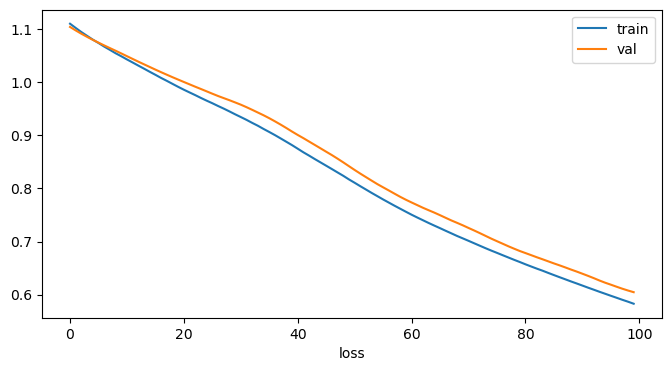

In [15]:
plt.figure(figsize = (8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.xlabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 함수형

In [16]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [17]:
# 모델 정의
inputs = Input(shape = (X_train.shape[1], )) # 입력층 정의 input(shape=(독립변수 수, ))
x = Dense(12, activation = 'relu')(inputs) # 은닉층 1번
x = Dense(6, activation = 'relu')(x) # 은닉층 2번
x = Dense(3, activation = 'softmax')(x) # 출력층
model = Model(inputs, x)
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 200, batch_size = 50, validation_data = (X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
# pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0)
# print(classification_report(y_test, pred))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 12)                60        
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1/3 [=========>....................] - ETA: 0s - loss: 1.0694 - accuracy: 0.3800

2024-09-10 09:43:15.936076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:43:15.978132: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:43:15.978212: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 09:43:16.123343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 84ms/step - loss: 1.0764 - accuracy: 0.3429 - val_loss: 1.0741 - val_accuracy: 0.3111
Epoch 2/200
3/3 [==============================] - 0s 27ms/step - loss: 1.0690 - accuracy: 0.3429 - val_loss: 1.0681 - val_accuracy: 0.3111
Epoch 3/200
3/3 [==============================] - 0s 25ms/step - loss: 1.0618 - accuracy: 0.3429 - val_loss: 1.0627 - val_accuracy: 0.3111
Epoch 4/200
1/3 [=========>....................] - ETA: 0s - loss: 1.0345 - accuracy: 0.4400

2024-09-10 09:43:16.146815: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:43:16.146877: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 24ms/step - loss: 1.0554 - accuracy: 0.3429 - val_loss: 1.0575 - val_accuracy: 0.3111
Epoch 5/200
3/3 [==============================] - 0s 25ms/step - loss: 1.0492 - accuracy: 0.3429 - val_loss: 1.0525 - val_accuracy: 0.3111
Epoch 6/200
3/3 [==============================] - 0s 24ms/step - loss: 1.0434 - accuracy: 0.3429 - val_loss: 1.0477 - val_accuracy: 0.3111
Epoch 7/200
3/3 [==============================] - 0s 21ms/step - loss: 1.0379 - accuracy: 0.3429 - val_loss: 1.0431 - val_accuracy: 0.3556
Epoch 8/200
3/3 [==============================] - 0s 24ms/step - loss: 1.0326 - accuracy: 0.3619 - val_loss: 1.0386 - val_accuracy: 0.4222
Epoch 9/200
3/3 [==============================] - 0s 25ms/step - loss: 1.0277 - accuracy: 0.4190 - val_loss: 1.0345 - val_accuracy: 0.4667
Epoch 10/200
3/3 [==============================] - 0s 24ms/step - loss: 1.0227 - accuracy: 0.5048 - val_loss: 1.0304 - val_accuracy: 0.5111
Epoch 11/200
3/3 [=============

3/3 [==============================] - 0s 26ms/step - loss: 0.7232 - accuracy: 0.6857 - val_loss: 0.7550 - val_accuracy: 0.6222
Epoch 63/200
3/3 [==============================] - 0s 26ms/step - loss: 0.7168 - accuracy: 0.6857 - val_loss: 0.7490 - val_accuracy: 0.6222
Epoch 64/200
3/3 [==============================] - 0s 25ms/step - loss: 0.7102 - accuracy: 0.6857 - val_loss: 0.7424 - val_accuracy: 0.6222
Epoch 65/200
3/3 [==============================] - 0s 24ms/step - loss: 0.7035 - accuracy: 0.6857 - val_loss: 0.7359 - val_accuracy: 0.6222
Epoch 66/200
3/3 [==============================] - 0s 25ms/step - loss: 0.6971 - accuracy: 0.6857 - val_loss: 0.7292 - val_accuracy: 0.6222
Epoch 67/200
3/3 [==============================] - 0s 26ms/step - loss: 0.6907 - accuracy: 0.6857 - val_loss: 0.7227 - val_accuracy: 0.6222
Epoch 68/200
3/3 [==============================] - 0s 26ms/step - loss: 0.6842 - accuracy: 0.6857 - val_loss: 0.7166 - val_accuracy: 0.6222
Epoch 69/200
3/3 [========

3/3 [==============================] - 0s 24ms/step - loss: 0.4502 - accuracy: 0.7524 - val_loss: 0.4851 - val_accuracy: 0.6667
Epoch 121/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4475 - accuracy: 0.7524 - val_loss: 0.4832 - val_accuracy: 0.6667
Epoch 122/200
3/3 [==============================] - 0s 27ms/step - loss: 0.4452 - accuracy: 0.7524 - val_loss: 0.4811 - val_accuracy: 0.6667
Epoch 123/200
3/3 [==============================] - 0s 26ms/step - loss: 0.4426 - accuracy: 0.7524 - val_loss: 0.4790 - val_accuracy: 0.6667
Epoch 124/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4402 - accuracy: 0.7619 - val_loss: 0.4771 - val_accuracy: 0.6889
Epoch 125/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4378 - accuracy: 0.7619 - val_loss: 0.4749 - val_accuracy: 0.6889
Epoch 126/200
3/3 [==============================] - 0s 26ms/step - loss: 0.4353 - accuracy: 0.7619 - val_loss: 0.4704 - val_accuracy: 0.6889
Epoch 127/200
3/3 [=

Epoch 178/200
3/3 [==============================] - 0s 25ms/step - loss: 0.3269 - accuracy: 0.9048 - val_loss: 0.3598 - val_accuracy: 0.8889
Epoch 179/200
3/3 [==============================] - 0s 24ms/step - loss: 0.3242 - accuracy: 0.9143 - val_loss: 0.3549 - val_accuracy: 0.9333
Epoch 180/200
3/3 [==============================] - 0s 25ms/step - loss: 0.3210 - accuracy: 0.9143 - val_loss: 0.3497 - val_accuracy: 0.9333
Epoch 181/200
3/3 [==============================] - 0s 25ms/step - loss: 0.3183 - accuracy: 0.9333 - val_loss: 0.3463 - val_accuracy: 0.9333
Epoch 182/200
3/3 [==============================] - 0s 26ms/step - loss: 0.3162 - accuracy: 0.9429 - val_loss: 0.3435 - val_accuracy: 0.9333
Epoch 183/200
3/3 [==============================] - 0s 26ms/step - loss: 0.3143 - accuracy: 0.9429 - val_loss: 0.3392 - val_accuracy: 0.9556
Epoch 184/200
3/3 [==============================] - 0s 26ms/step - loss: 0.3120 - accuracy: 0.9524 - val_loss: 0.3355 - val_accuracy: 0.9556
Epoch 

2024-09-10 09:43:29.274485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


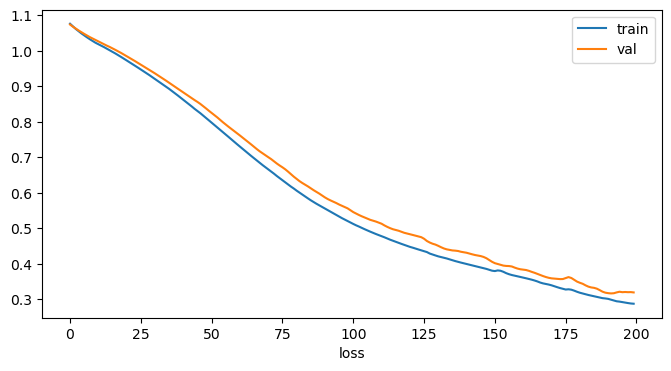

In [18]:
plt.figure(figsize = (8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.xlabel('loss')
plt.legend(['train', 'val'])
plt.show()

# class

In [19]:
# class 생성
class Iris(tf.keras.Model) :
    def __init__(self) : 
        super(Iris, self).__init__()
        self.dense1 = tf.keras.layers.Dense(12, activation = 'relu')
        self.dense2 = tf.keras.layers.Dense(6, activation = 'relu')
        self.classifier = tf.keras.layers.Dense(3, activation = 'softmax')
        
    def call(self, inputs) :
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.classifier(x)

In [20]:
model = Iris()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 200, batch_size = 50, validation_data = (X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)

Epoch 1/200
1/3 [=========>....................] - ETA: 0s - loss: 1.2492 - accuracy: 0.3400

2024-09-10 09:43:29.735976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:43:29.777432: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:43:29.777500: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 09:43:29.913946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:43:29.936417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to

3/3 [==============================] - 0s 78ms/step - loss: 1.2653 - accuracy: 0.3429 - val_loss: 1.2677 - val_accuracy: 0.3111
Epoch 2/200
3/3 [==============================] - 0s 27ms/step - loss: 1.2471 - accuracy: 0.3429 - val_loss: 1.2502 - val_accuracy: 0.3111
Epoch 3/200
3/3 [==============================] - 0s 25ms/step - loss: 1.2306 - accuracy: 0.3429 - val_loss: 1.2348 - val_accuracy: 0.3111
Epoch 4/200
3/3 [==============================] - 0s 23ms/step - loss: 1.2155 - accuracy: 0.3429 - val_loss: 1.2205 - val_accuracy: 0.3111
Epoch 5/200
3/3 [==============================] - 0s 23ms/step - loss: 1.2028 - accuracy: 0.3429 - val_loss: 1.2072 - val_accuracy: 0.3111
Epoch 6/200
3/3 [==============================] - 0s 25ms/step - loss: 1.1899 - accuracy: 0.3429 - val_loss: 1.1951 - val_accuracy: 0.3111
Epoch 7/200
3/3 [==============================] - 0s 29ms/step - loss: 1.1789 - accuracy: 0.3429 - val_loss: 1.1842 - val_accuracy: 0.3111
Epoch 8/200
3/3 [===============

3/3 [==============================] - 0s 24ms/step - loss: 0.9327 - accuracy: 0.6857 - val_loss: 0.9647 - val_accuracy: 0.6222
Epoch 60/200
3/3 [==============================] - 0s 22ms/step - loss: 0.9277 - accuracy: 0.6857 - val_loss: 0.9602 - val_accuracy: 0.6222
Epoch 61/200
3/3 [==============================] - 0s 26ms/step - loss: 0.9226 - accuracy: 0.6857 - val_loss: 0.9557 - val_accuracy: 0.6222
Epoch 62/200
3/3 [==============================] - 0s 25ms/step - loss: 0.9176 - accuracy: 0.6857 - val_loss: 0.9511 - val_accuracy: 0.6222
Epoch 63/200
3/3 [==============================] - 0s 24ms/step - loss: 0.9126 - accuracy: 0.6857 - val_loss: 0.9465 - val_accuracy: 0.6222
Epoch 64/200
3/3 [==============================] - 0s 25ms/step - loss: 0.9075 - accuracy: 0.6857 - val_loss: 0.9417 - val_accuracy: 0.6222
Epoch 65/200
3/3 [==============================] - 0s 26ms/step - loss: 0.9025 - accuracy: 0.6857 - val_loss: 0.9370 - val_accuracy: 0.6222
Epoch 66/200
3/3 [========

3/3 [==============================] - 0s 26ms/step - loss: 0.5933 - accuracy: 0.6857 - val_loss: 0.6422 - val_accuracy: 0.6222
Epoch 118/200
3/3 [==============================] - 0s 23ms/step - loss: 0.5888 - accuracy: 0.6857 - val_loss: 0.6377 - val_accuracy: 0.6222
Epoch 119/200
3/3 [==============================] - 0s 27ms/step - loss: 0.5845 - accuracy: 0.6857 - val_loss: 0.6333 - val_accuracy: 0.6222
Epoch 120/200
3/3 [==============================] - 0s 25ms/step - loss: 0.5804 - accuracy: 0.6857 - val_loss: 0.6288 - val_accuracy: 0.6222
Epoch 121/200
3/3 [==============================] - 0s 22ms/step - loss: 0.5763 - accuracy: 0.6857 - val_loss: 0.6244 - val_accuracy: 0.6222
Epoch 122/200
3/3 [==============================] - 0s 25ms/step - loss: 0.5722 - accuracy: 0.6857 - val_loss: 0.6202 - val_accuracy: 0.6222
Epoch 123/200
3/3 [==============================] - 0s 25ms/step - loss: 0.5680 - accuracy: 0.6857 - val_loss: 0.6161 - val_accuracy: 0.6222
Epoch 124/200
3/3 [=

Epoch 175/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4145 - accuracy: 0.8952 - val_loss: 0.4510 - val_accuracy: 0.8889
Epoch 176/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4122 - accuracy: 0.8952 - val_loss: 0.4483 - val_accuracy: 0.8889
Epoch 177/200
3/3 [==============================] - 0s 26ms/step - loss: 0.4099 - accuracy: 0.8952 - val_loss: 0.4452 - val_accuracy: 0.8889
Epoch 178/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4077 - accuracy: 0.9048 - val_loss: 0.4424 - val_accuracy: 0.8889
Epoch 179/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4055 - accuracy: 0.9048 - val_loss: 0.4398 - val_accuracy: 0.8889
Epoch 180/200
3/3 [==============================] - 0s 24ms/step - loss: 0.4032 - accuracy: 0.9048 - val_loss: 0.4374 - val_accuracy: 0.8889
Epoch 181/200
3/3 [==============================] - 0s 27ms/step - loss: 0.4007 - accuracy: 0.9048 - val_loss: 0.4356 - val_accuracy: 0.8889
Epoch 

2024-09-10 09:43:42.799918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


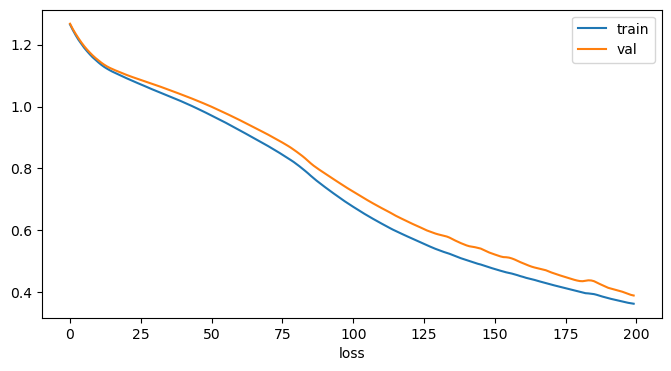

In [21]:
plt.figure(figsize = (8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.xlabel('loss')
plt.legend(['train', 'val'])
plt.show()